In [3]:
#EXTRAÇÂO
#Primeiro importar o pandas e carregar os dados
import pandas as pd

df = pd.read_csv('bank-full.csv', sep=';') #o sep é para que o pandas leia corretamente
#print(df.head())
#print(df.info())
#print(df.describe())

In [4]:
#TRANSFORMAÇÂO
#Limpeza: Verifique valores ausentes (NaN) e trate-os (remova ou preencha):

valores_ausentes = df.isnull().sum() # Mostra os valores ausentes em cada coluna
print(valores_ausentes)
preenchendo_valores_ausentes = df.fillna(method='ffill', inplace=True) #preenche o valor ausente com o seu anterior.
                                                                        #OBS: melhor apagar as linhas em branco!!

                                                                        

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


C:\Users\Renato\AppData\Local\Temp\ipykernel_4608\3612690100.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  preenchendo_valores_ausentes = df.fillna(method='ffill', inplace=True) #preenche o valor ausente com o seu anterior.


In [15]:
df['age'] = df['age'].astype('int') # Converte a coluna 'age' para inteiro
                                    #OBS: Não precisa pois já é inteiro

df['age_grup'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 100], labels=['18-25', '25-35', '35-45', '45-55', '55-100'])
#cria grupos de idade



In [16]:
#LOAD
#salvando os dados alterados em um novo arquivo
df.to_csv('bank_marketing_data_cleaned.csv', index=False)

In [17]:
#Análise Exploratória de Dados (EDA):
df_novo = pd.read_csv('bank_marketing_data_cleaned.csv', sep=';')
print(df_novo.describe()) #A produção do novo arquivo fez ele ficar mal formatado

       age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_grup,cluster
count                                               45211                                                                                   
unique                                              45211                                                                                   
top     58,management,married,tertiary,no,2143,yes,no,...                                                                                   
freq                                                    1                                                                                   


<function matplotlib.pyplot.show(close=None, block=None)>

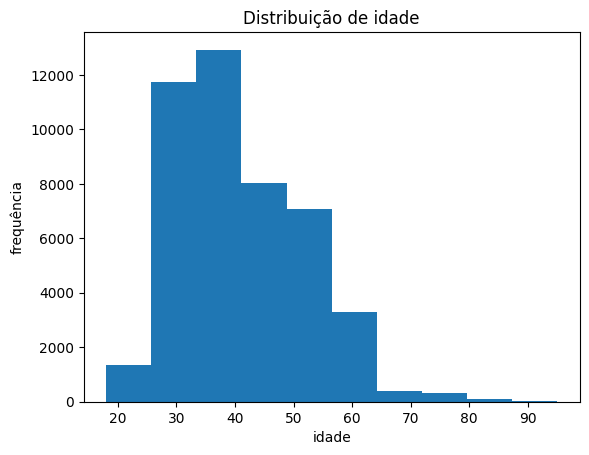

In [18]:
#Para visualizar

import matplotlib.pyplot as plt

plt.hist(df['age'], bins=10)
plt.xlabel('idade')
plt.ylabel('frequência')
plt.title('Distribuição de idade')
plt.show
#E é assim que se faz um grafico Histograma:

<function matplotlib.pyplot.show(close=None, block=None)>

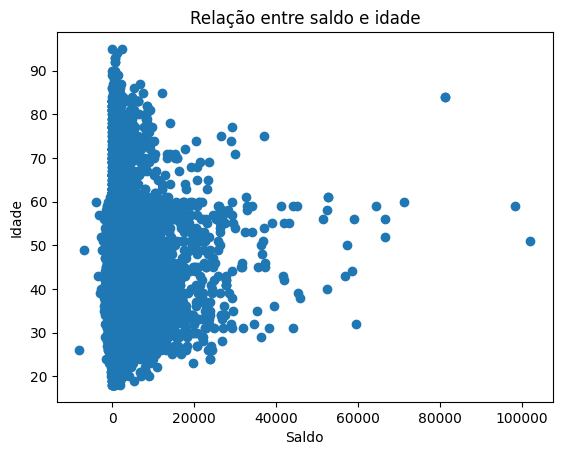

In [19]:
plt.scatter(df['balance'], df['age'])
plt.xlabel('Saldo')
plt.ylabel('Idade')
plt.title('Relação entre saldo e idade')
plt.show
#E é assim que se faz um grafico Disperçao:

In [20]:
colunas_numericas = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df_numerico = df[colunas_numericas]

# Calcule a correlação entre as variáveis numéricas
correlacao = df_numerico.corr()
print(correlacao)

               age   balance  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.021560 -0.014578  0.003435  0.016674
duration -0.004648  0.021560  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674  0.001203 -0.032855  0.454820  1.000000


In [21]:
#Utilizando a Análise de Cluster: métodos de agrupamento para identificar grupos
# de clientes com características semelhantes:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 3, random_state=0)
kmeans.fit(df[['balance', 'age']])
df['cluster'] = kmeans.labels_



c:\Users\Renato\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df2 = pd.read_csv('bank-full.csv', sep= ';') #carregando o novo arquivo que contem mais info.
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  \
0  unknown    5   may       261         1     -1         0  unknown  no   
1  unknown    5   may       151         1     -1         0  unknown  no   
2  unknown    5   may        76         1     -1         0  unknown  no   
3  unknown    5   may        92         1     -1         0  unknown  no   
4  unknown    5   may       198         1     -1         0  unknown  no   

  age_grup  cluster  
0   55-100        2  
1    35-45        2  
2    25-35        2  
3    45-55      

In [24]:
#Transformando variaveis categoricas em variaveis numericas
df = pd.get_dummies(df, drop_first=True)
print(df.columns) # Verificar o nome da coluna de destino ('y' que indica se o cliente fez o depósito)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'cluster', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'y_yes',
       'age_grup_25-35', 'age_grup_35-45', 'age_grup_45-55',
       'age_grup_55-100'],
      dtype='object')


In [27]:
#Dividindo os dados para treinamento e teste da maquina

from sklearn.model_selection import train_test_split

#definindo as variaveis independentes X e dependentes Y
X = df.drop('y_yes', axis=1) # Ajuste de 'y_yes' conforme a codificação
Y = df['y_yes']

# Dividindo os dados entre treinamento e teste
X_train, X_test,  Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Lembrando que o x e y de cima são os mesmos então tem que ser iguais em relação a maiusculos ou não.

In [28]:
#Utolizado o modelo de arvore de decisão. é o que sei

from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(random_state=42) # Iniciando

# Treinando

modelo.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
# Avaliando o modelo utilizando as metricas: precisão, recall e F1- score
from sklearn.metrics import classification_report, accuracy_score

# Fazendo previsão no cojunto de dados
Y_pred = modelo.predict(X_test)

# Avaliar o modelo
print(f' Acurácia: {accuracy_score(Y_test, Y_pred)}')
print(classification_report(Y_test, Y_pred))

 Acurácia: 0.8743779719119761
              precision    recall  f1-score   support

       False       0.93      0.93      0.93      7952
        True       0.48      0.50      0.49      1091

    accuracy                           0.87      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.87      0.88      9043



In [31]:
# Salvando o modelo para poder utilizalo com outro dados

import joblib

# Salvar o modelo
joblib.dump(modelo, 'modelo_decision_tree.pkl')


['modelo_decision_tree.pkl']

In [32]:
#Como trabalhar com o modelo salvo utilizando outros dados.

#import joblib

# Carregar o modelo
#model = joblib.load('modelo_decision_tree.pkl')

# Fazer previsões
#novos_dados = [...]  # Substitua por novos dados
#previsoes = model.predict(novos_dados)
#print(previsoes)
